In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [2]:
mydata=pd.read_csv("cyberbullying_tweets.csv")
mydata.head(20)


,tweet_text,cyberbullying_type
0,certain situations. Im grown and educated now ...,ethnicity
1,There is humanity of jamatis but my creative #...,religion
2,@krainboltgreene https://t.co/FO2FBlj5wy,other_cyberbullying
3,Now Annie is worried about the blondes.. Too l...,gender
4,@CamilleHughes16 @IftikharAwan What does that ...,not_cyberbullying
5,Barr was high school bully.,age
6,idk about y’all but he looks like bully me in ...,age
7,Calling people dumb isnt nice :( RT @tayyoung_...,ethnicity
8,@AWPromotions so john cena make gay comments. ...,gender
9,@TheSunNewspaper #pinkbus the feminazi bus arr...,gender


In [3]:
mydata["cyberbullying_type"].value_counts()/mydata.shape[0]
mydata["cb_type_num"] = pd.factorize(mydata["cyberbullying_type"])[0]+1

In [4]:
mydata_final=mydata[["tweet_text","cb_type_num"]]
mydata_final.head(20)

,tweet_text,cb_type_num
0,certain situations. Im grown and educated now ...,1
1,There is humanity of jamatis but my creative #...,2
2,@krainboltgreene https://t.co/FO2FBlj5wy,3
3,Now Annie is worried about the blondes.. Too l...,4
4,@CamilleHughes16 @IftikharAwan What does that ...,5
5,Barr was high school bully.,6
6,idk about y’all but he looks like bully me in ...,6
7,Calling people dumb isnt nice :( RT @tayyoung_...,1
8,@AWPromotions so john cena make gay comments. ...,4
9,@TheSunNewspaper #pinkbus the feminazi bus arr...,4


In [5]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

In [6]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = mydata_final.tweet_text # the column text contains textual data to extract features from
y = mydata_final.cb_type_num # this is the column we are learning to predict. 
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(47692,) (47692,)
(28615,) (28615,)
(19077,) (19077,)


In [7]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
# i.e., the dimension of our feature vector is 49753!

(28615, 55591) (19077, 55591)


In [8]:
from sklearn.svm import SVC 
LinearClassifier = SVC(kernel='linear', random_state=0)
%time LinearClassifier.fit(X_train_dtm, y_train)

RBFClassifier = SVC(kernel='rbf', random_state=0)
%time RBFClassifier.fit(X_train_dtm, y_train)

PolynomialClassifier = SVC(kernel='poly', random_state=0)
%time PolynomialClassifier.fit(X_train_dtm, y_train)

SigmoidClassifier = SVC(kernel='sigmoid', random_state=0)
%time SigmoidClassifier.fit(X_train_dtm, y_train)  

Wall time: 1min 5s
Wall time: 1min 57s
Wall time: 4min 18s
Wall time: 58.3 s


SVC(kernel='sigmoid', random_state=0)

In [9]:
y_pred_class_linear = LinearClassifier.predict(X_test_dtm) # make class predictions for X_test_dtm
y_pred_class_RBF = RBFClassifier.predict(X_test_dtm) # make class predictions for X_test_dtm
y_pred_class_Polynomial = PolynomialClassifier.predict(X_test_dtm) # make class predictions for X_test_dtm
y_pred_class_sigmoid = SigmoidClassifier.predict(X_test_dtm) # make class predictions for X_test_dtm

In [10]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score, recall_score,precision_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)



Accuracy:  80.77
Precision:  [96.60056657 95.9446093  53.5942492  89.95633188 55.67044696 97.89540816]
Recall:  [97.18176061 92.26379201 65.06140918 82.57786001 51.48056755 96.35907094]


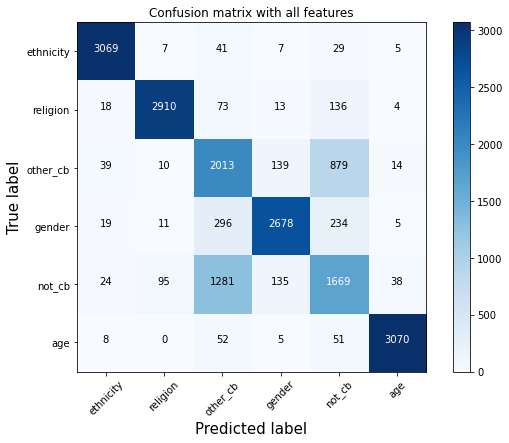

In [24]:
#LINEAR SVM

print("Accuracy: ", round(accuracy_score(y_test, y_pred_class_linear)*100,2))
p=precision_score(y_test, y_pred_class_linear, average=None)
print("Precision: ", p*100)
r=recall_score(y_test, y_pred_class_linear, average=None)
print("Recall: ", r*100)
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class_linear)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['ethnicity','religion','other_cb','gender','not_cb','age'],normalize=False,
                      title='Confusion matrix with all features')

Accuracy:  81.78
Precision:  [97.70152153 93.5556268  54.23976608 93.71345029 64.55073759 98.45559846]
Recall:  [95.56681444 92.51743817 83.93665158 79.06259636 44.54040716 96.04519774]


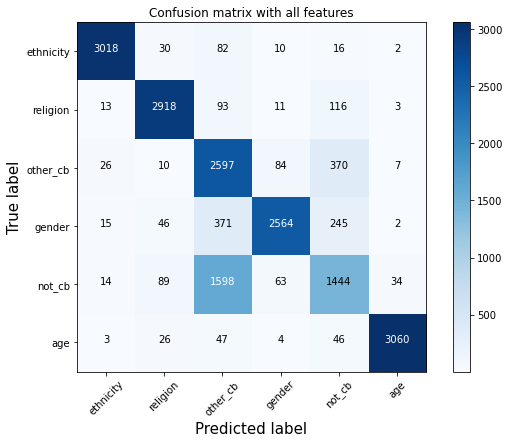

In [25]:
#RBF KERNEL SVM

print("Accuracy: ", round(accuracy_score(y_test, y_pred_class_RBF)*100,2))
p=precision_score(y_test, y_pred_class_RBF, average=None)
print("Precision: ", p*100)
r=recall_score(y_test, y_pred_class_RBF, average=None)
print("Recall: ", r*100)
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class_RBF)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['ethnicity','religion','other_cb','gender','not_cb','age'],normalize=False,
                      title='Confusion matrix with all features')

Accuracy:  57.98
Precision:  [98.59601449 98.82075472 27.72667543 98.88235294 50.52410901 99.42154736]
Recall:  [68.93603547 39.85415346 95.47511312 51.83472094  7.43368291 86.31512869]


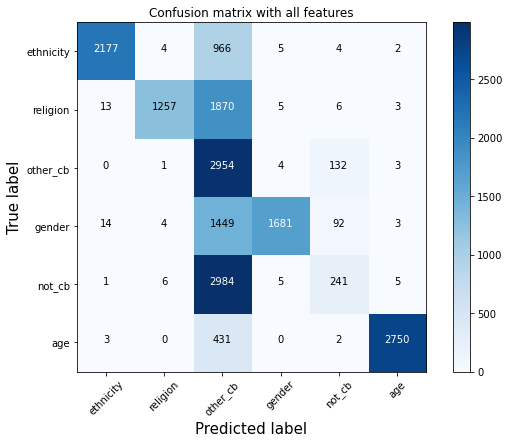

In [26]:
#POLYNOMIAL KERNEL SVM

print("Accuracy: ", round(accuracy_score(y_test, y_pred_class_Polynomial)*100,2))
p=precision_score(y_test, y_pred_class_Polynomial, average=None)
print("Precision: ", p*100)
r=recall_score(y_test, y_pred_class_Polynomial, average=None)
print("Recall: ", r*100)
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class_Polynomial)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['ethnicity','religion','other_cb','gender','not_cb','age'],normalize=False,
                      title='Confusion matrix with all features')

Accuracy:  82.46
Precision:  [96.97741012 96.07131066 54.75700165 94.35483871 66.80478821 98.09463322]
Recall:  [96.51678277 92.26379201 85.94053006 79.37095282 44.75632326 96.95543001]


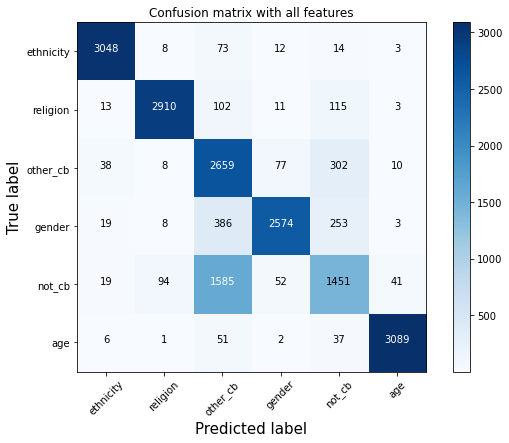

In [27]:
#SIGMOID SVM

print("Accuracy: ", round(accuracy_score(y_test, y_pred_class_sigmoid)*100,2))
p=precision_score(y_test, y_pred_class_sigmoid, average=None)
print("Precision: ", p*100)
r=recall_score(y_test, y_pred_class_sigmoid, average=None)
print("Recall: ", r*100)
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class_sigmoid)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['ethnicity','religion','other_cb','gender','not_cb','age'],normalize=False,
                      title='Confusion matrix with all features')

In [28]:

t1_check = "She was bullied at school"
t2_check = "Everyone deserves to be loved"
clean(t1_check)
t1=[t1_check]
t1 = vect.transform(t1)
y_ch = LinearClassifier.predict(t1)

labels = ['ethnicity','religion','other_cb','gender','not_cb','age']
print(t1_check, " is ", "\'",labels[y_ch[0]-1], "\'"," type of bullying")

clean(t2_check)
t2=[t2_check]
t2 = vect.transform(t2)
y_ch = LinearClassifier.predict(t2)
print(t2_check, " is ","\'",labels[y_ch[0]-1],"\'", " type of bullying")

She was bullied at school  is  ' age '  type of bullying
Everyone deserves to be loved  is  ' not_cb '  type of bullying


In [29]:

t1_check = "She was bullied at school"
t2_check = "Everyone deserves to be loved"
clean(t1_check)
t1=[t1_check]
t1 = vect.transform(t1)
y_ch = RBFClassifier.predict(t1)

labels = ['ethnicity','religion','other_cb','gender','not_cb','age']
print(t1_check, " is ", "\'",labels[y_ch[0]-1], "\'"," type of bullying")

clean(t2_check)
t2=[t2_check]
t2 = vect.transform(t2)
y_ch = RBFClassifier.predict(t2)
print(t2_check, " is ","\'",labels[y_ch[0]-1],"\'", " type of bullying")

She was bullied at school  is  ' age '  type of bullying
Everyone deserves to be loved  is  ' other_cb '  type of bullying


In [30]:

t1_check = "She was bullied at school"
t2_check = "Everyone deserves to be loved"
clean(t1_check)
t1=[t1_check]
t1 = vect.transform(t1)
y_ch = PolynomialClassifier.predict(t1)

labels = ['ethnicity','religion','other_cb','gender','not_cb','age']
print(t1_check, " is ", "\'",labels[y_ch[0]-1], "\'"," type of bullying")

clean(t2_check)
t2=[t2_check]
t2 = vect.transform(t2)
y_ch = PolynomialClassifier.predict(t2)
print(t2_check, " is ","\'",labels[y_ch[0]-1],"\'", " type of bullying")

She was bullied at school  is  ' other_cb '  type of bullying
Everyone deserves to be loved  is  ' other_cb '  type of bullying


In [31]:

t1_check = "She was bullied at school"
t2_check = "Everyone deserves to be loved"
clean(t1_check)
t1=[t1_check]
t1 = vect.transform(t1)
y_ch = SigmoidClassifier.predict(t1)

labels = ['ethnicity','religion','other_cb','gender','not_cb','age']
print(t1_check, " is ", "\'",labels[y_ch[0]-1], "\'"," type of bullying")

clean(t2_check)
t2=[t2_check]
t2 = vect.transform(t2)
y_ch = SigmoidClassifier.predict(t2)
print(t2_check, " is ","\'",labels[y_ch[0]-1],"\'", " type of bullying")

She was bullied at school  is  ' age '  type of bullying
Everyone deserves to be loved  is  ' other_cb '  type of bullying
